###### Problem Statement

- PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS.

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

- Dataset:- forestfires.csv

In [2]:
#Read dataset
data = pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


###### EDA

In [3]:
data.shape

(517, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
data.iloc[:, 2:11].describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
data.describe(include='O')

,month,day,size_category
count,517,517,517
unique,12,7,2
top,aug,sun,small
freq,184,95,378


In [7]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
#Checking Duplicates.
data[data.duplicated(keep=False)]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
52,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
99,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
214,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
302,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
425,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small


In [9]:
#Drop Duplicates.
data.drop_duplicates(keep='first', inplace=True)
data.reset_index(drop=True, inplace=True)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


- Visualization

In [10]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

<AxesSubplot:>

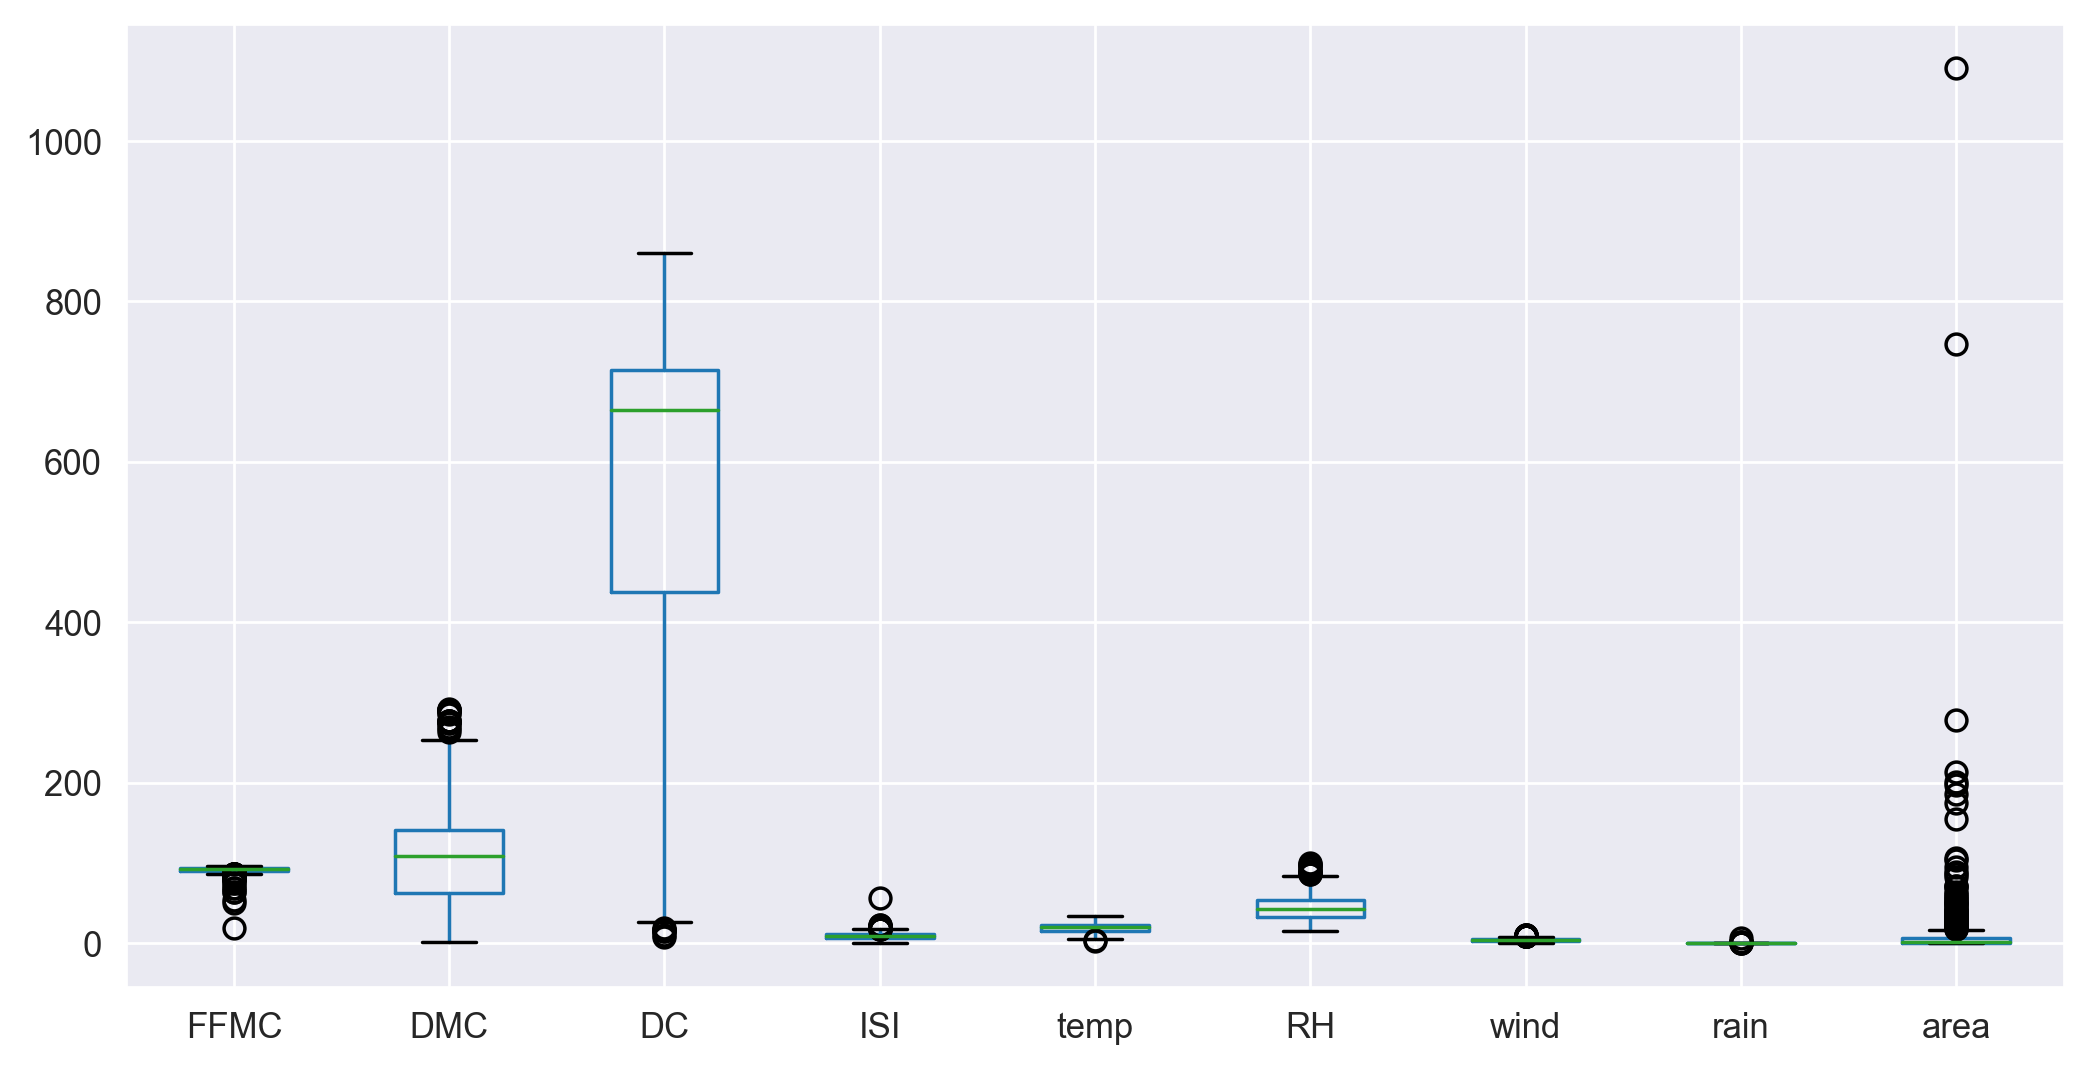

In [11]:
#Boxplot
data.iloc[:,2:11].boxplot()

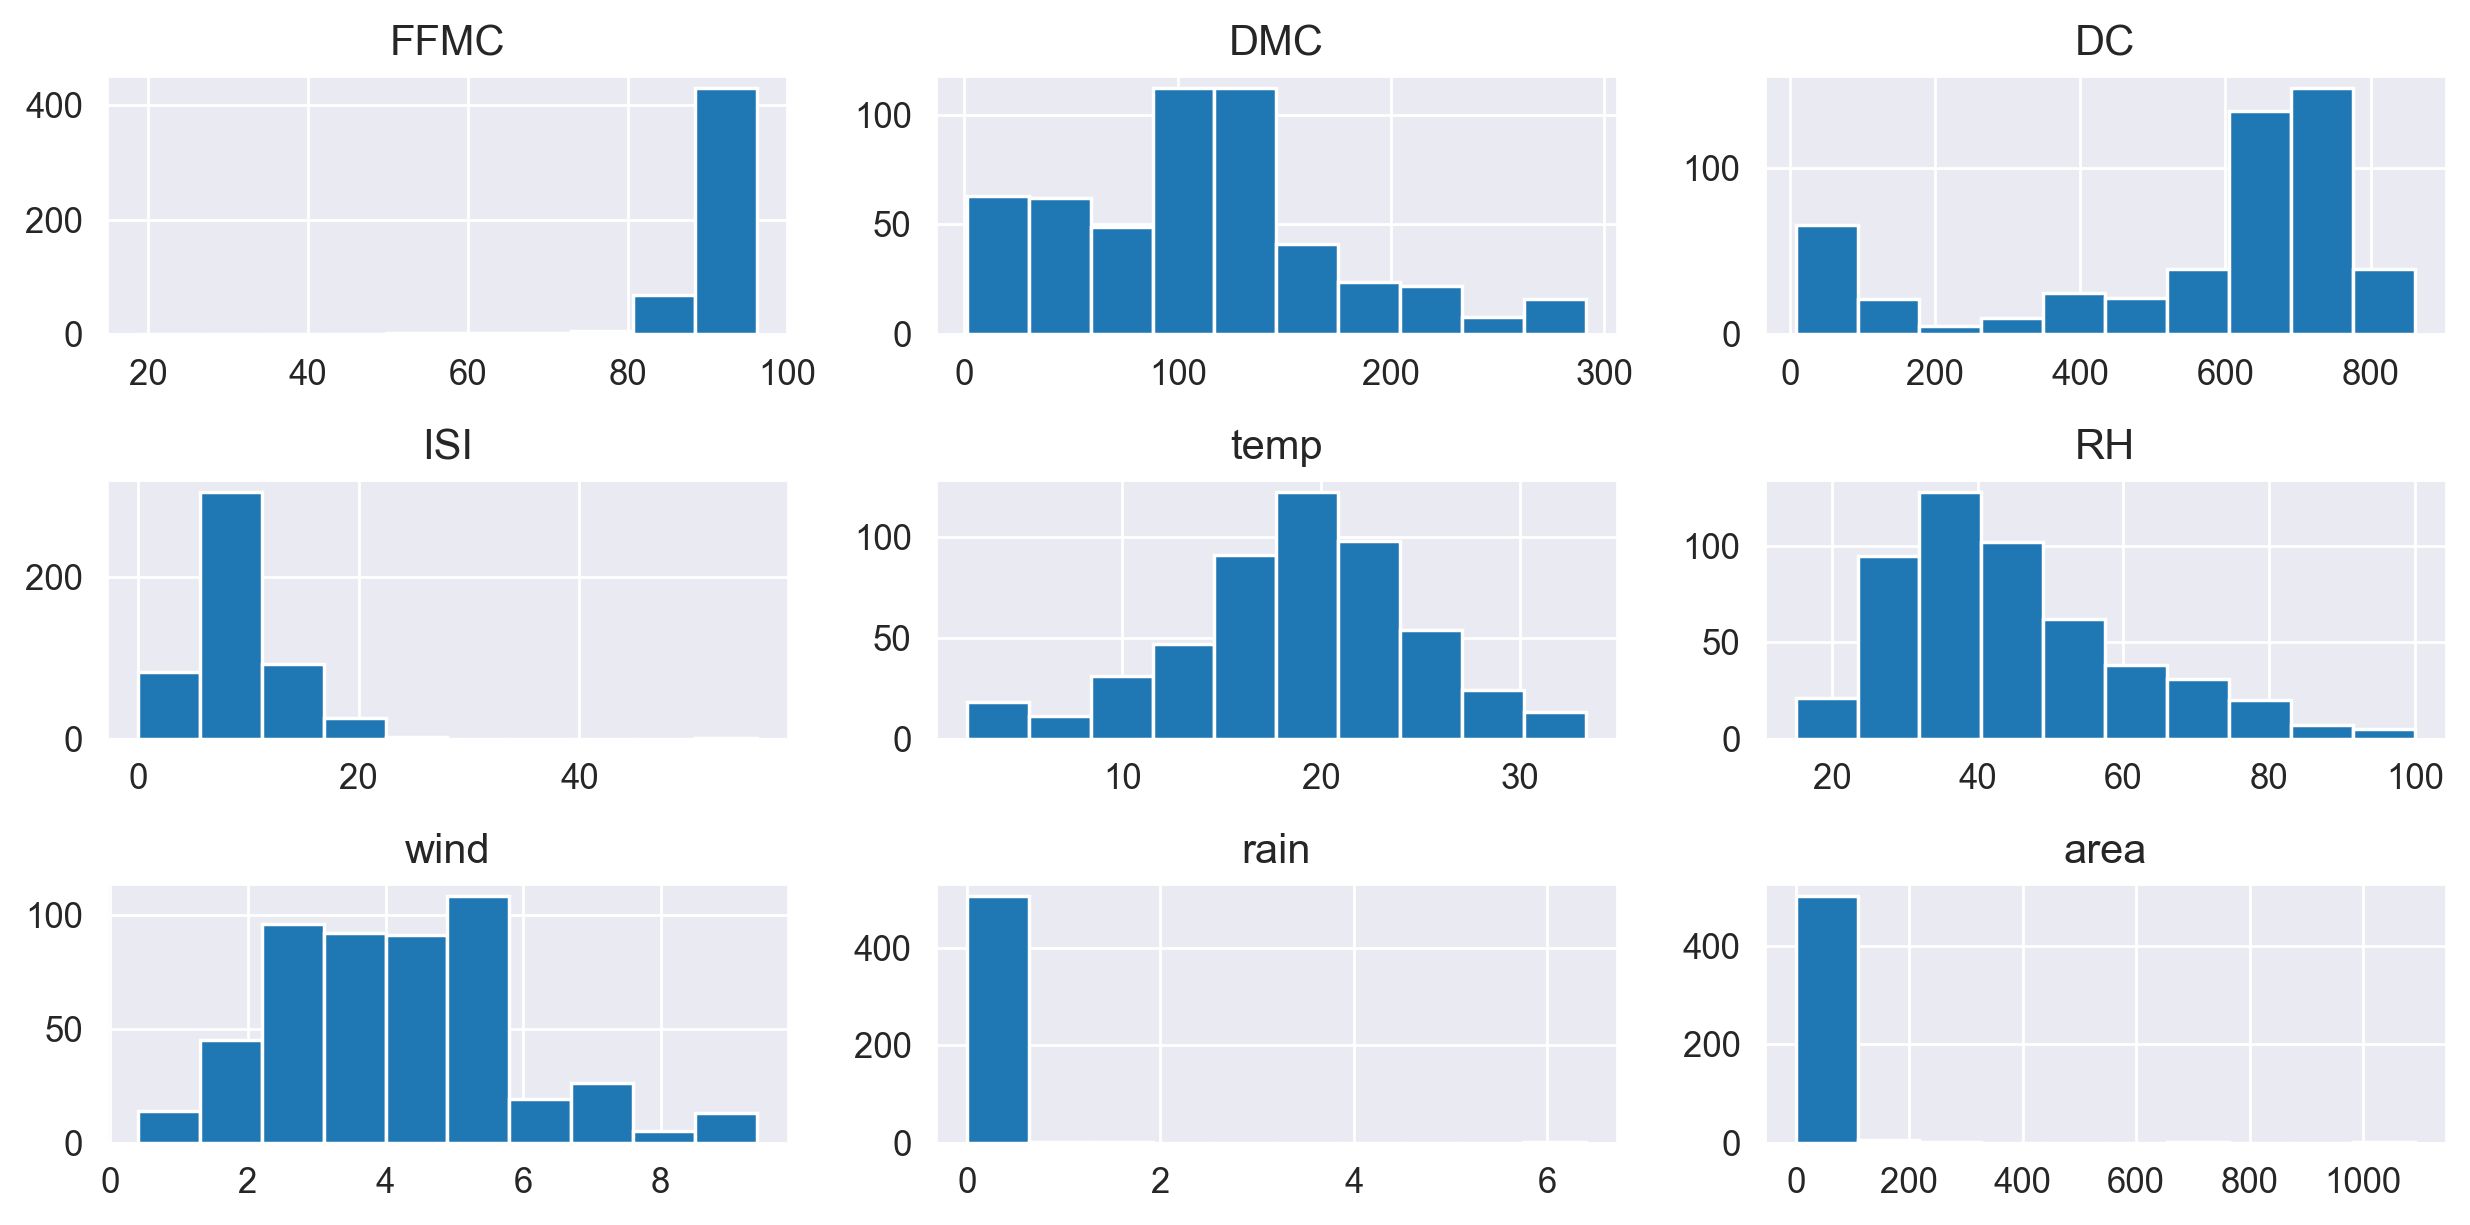

In [12]:
#Histogram
data.iloc[:,2:11].hist();
plt.tight_layout()

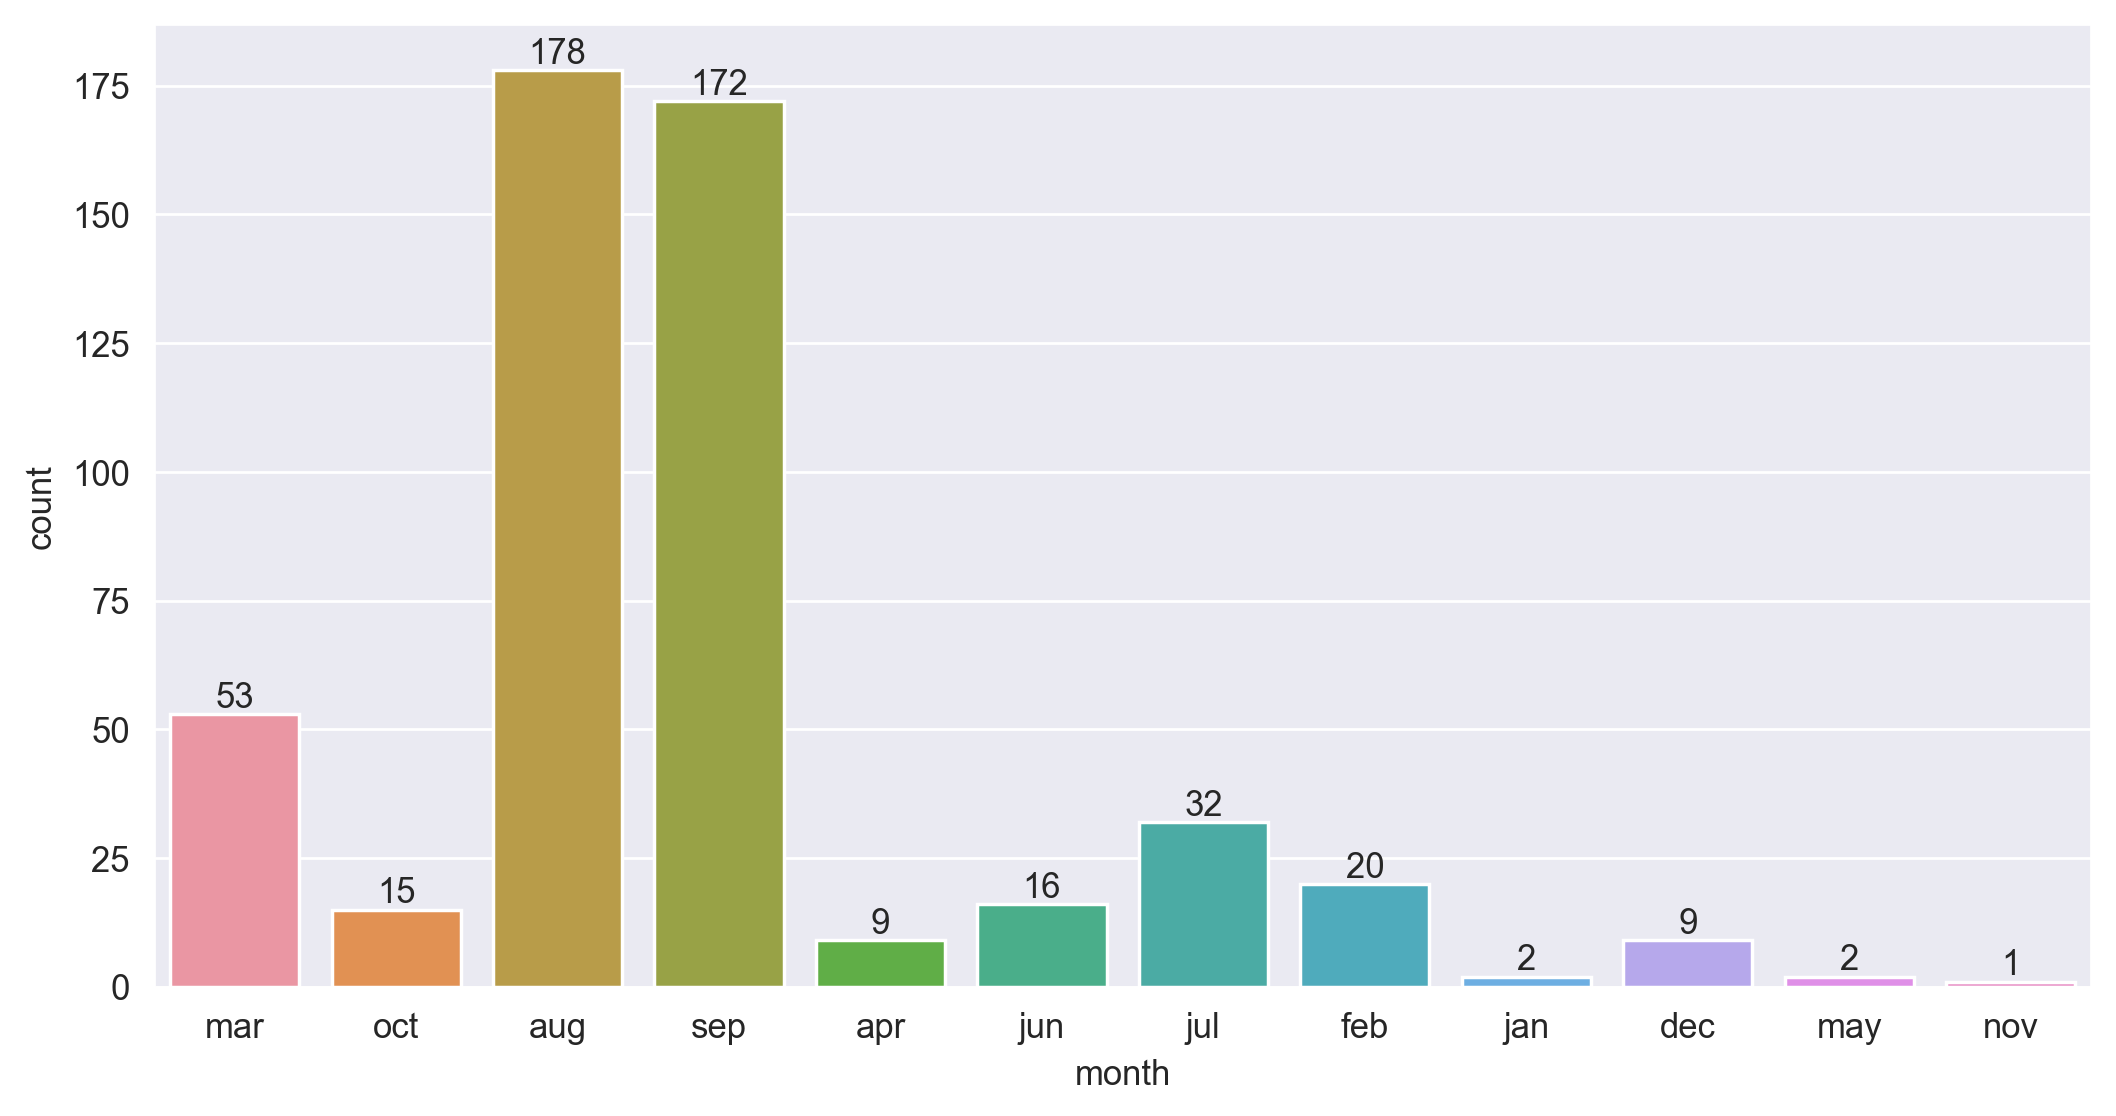

In [13]:
#Number of forest fires recorded in each months.
ax = sns.countplot('month', data=data)
ax.bar_label(ax.containers[0]);

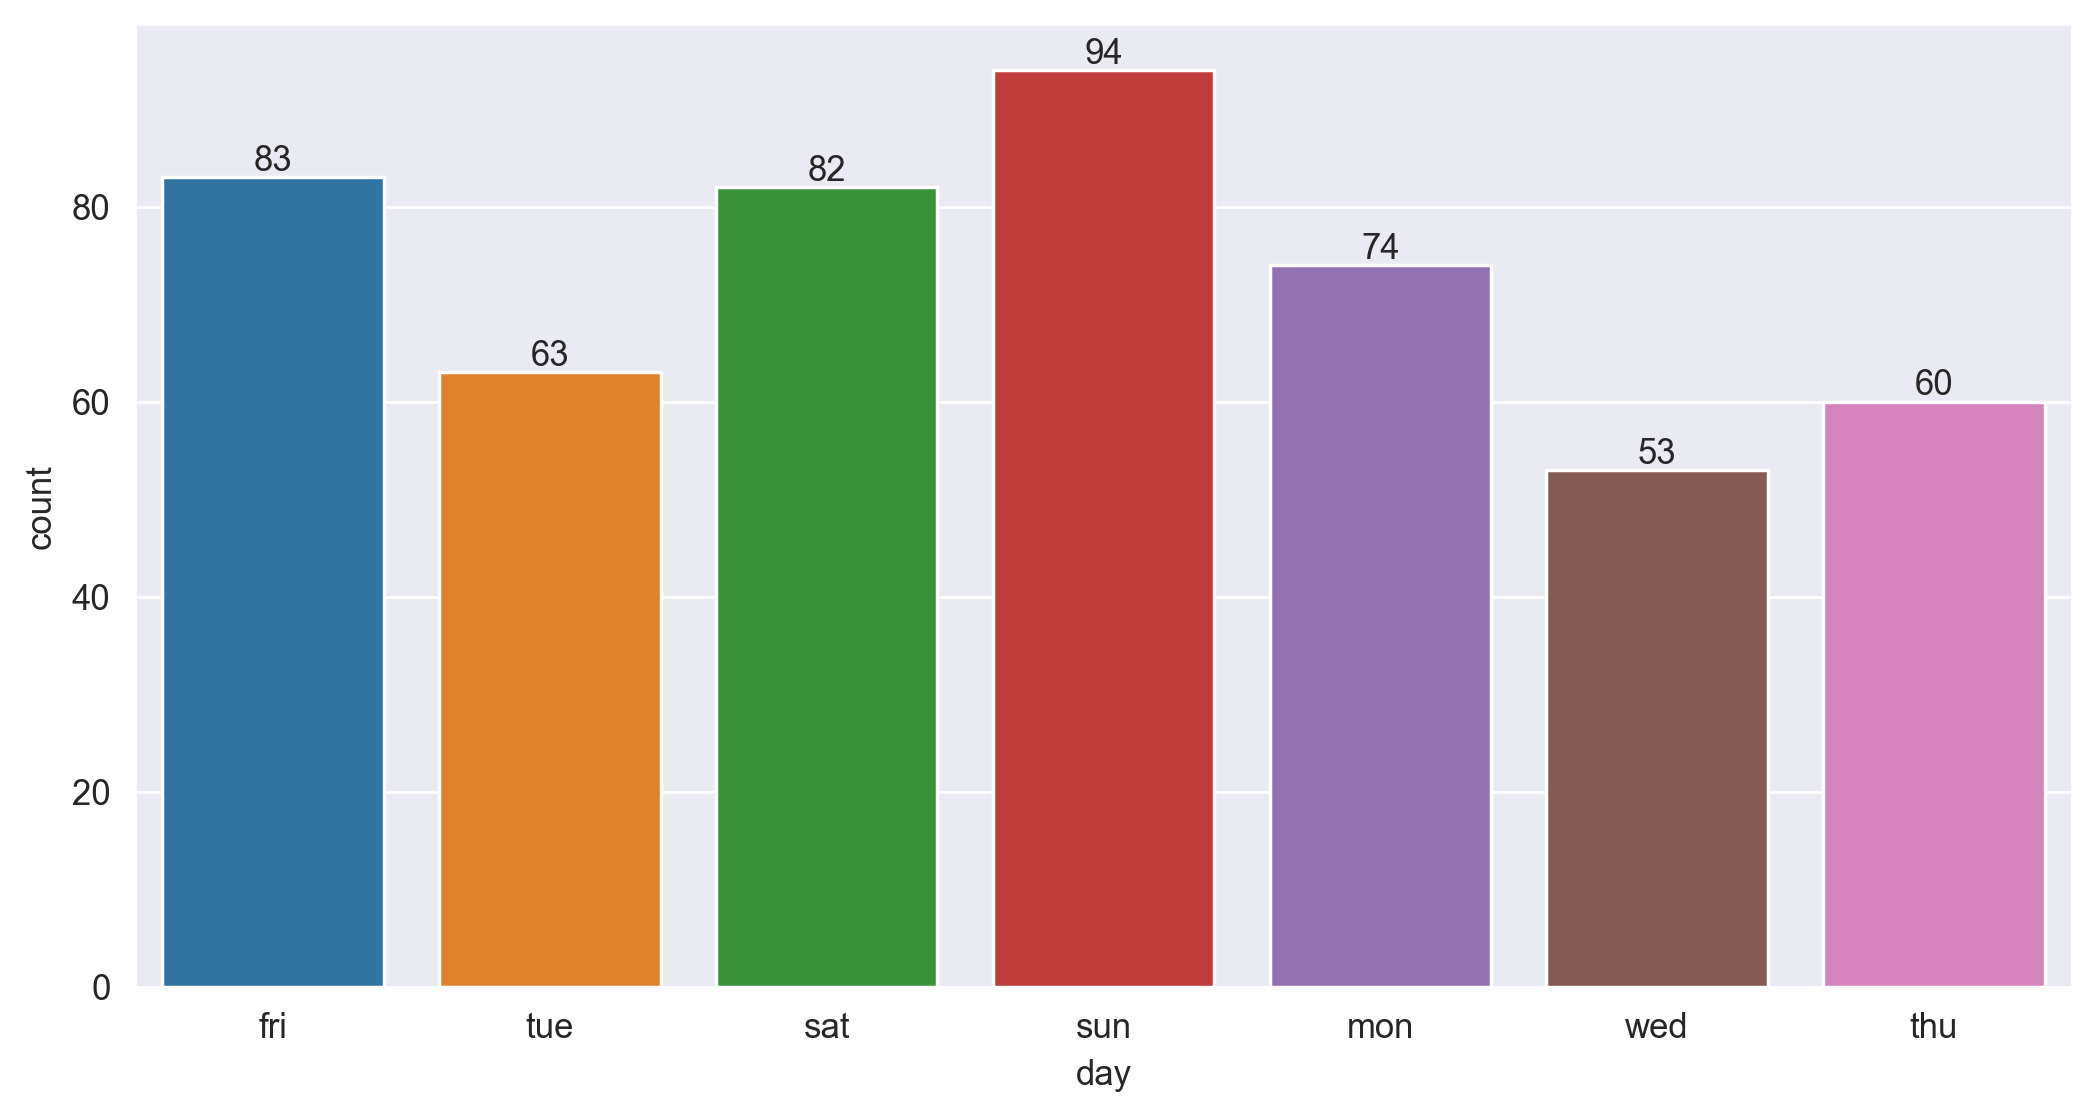

In [14]:
#Number of forest fires recorded in each days.
ax = sns.countplot('day', data=data)
ax.bar_label(ax.containers[0]);

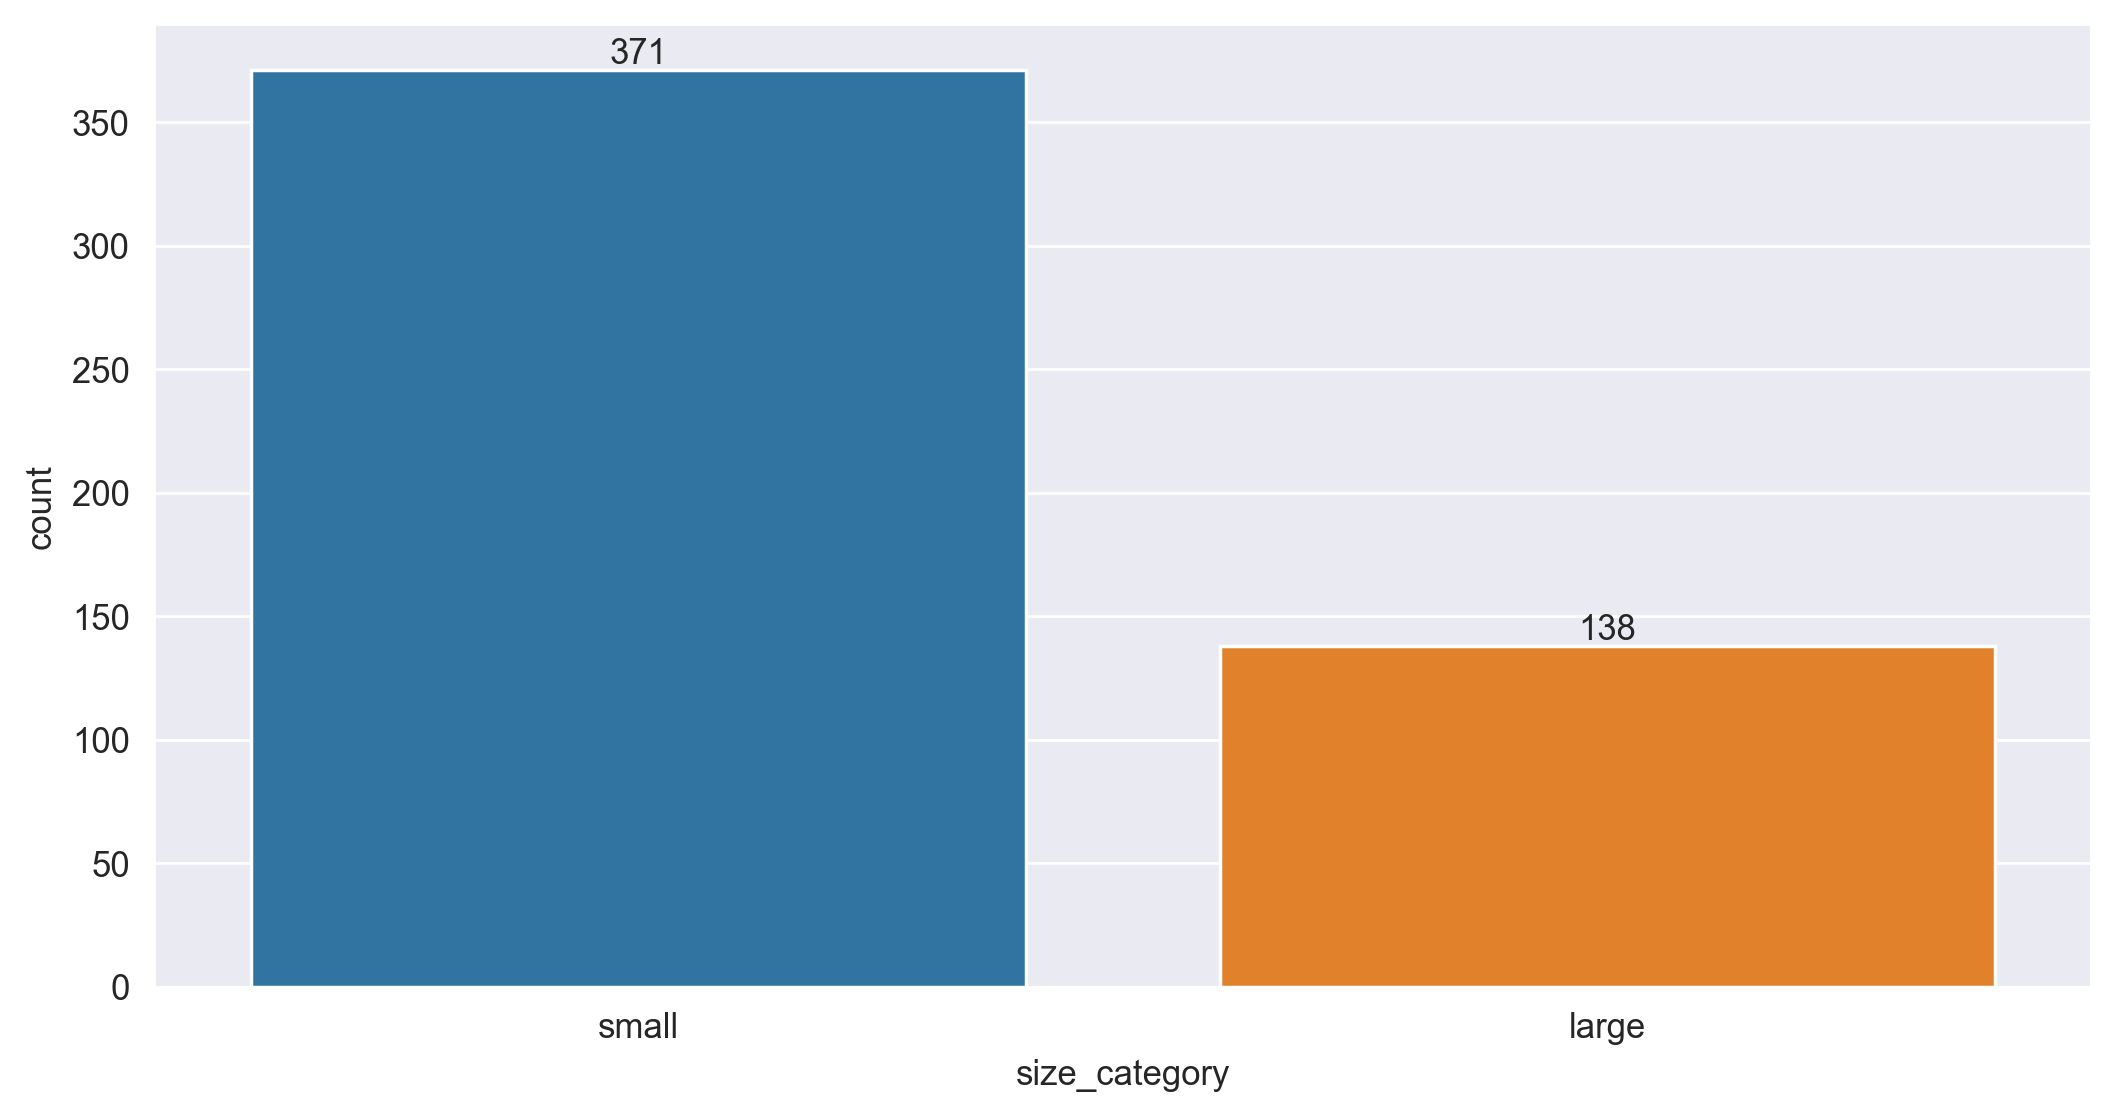

In [15]:
ax = sns.countplot('size_category', data=data)
ax.bar_label(ax.containers[0]);

In [16]:
#Drop month and day column.
data.drop(columns=['month', 'day'], inplace=True)
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [17]:
#Label encoding for target variable.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['size_category'] = le.fit_transform(data['size_category'])
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
df = data.loc[:,('FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area','size_category')]
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


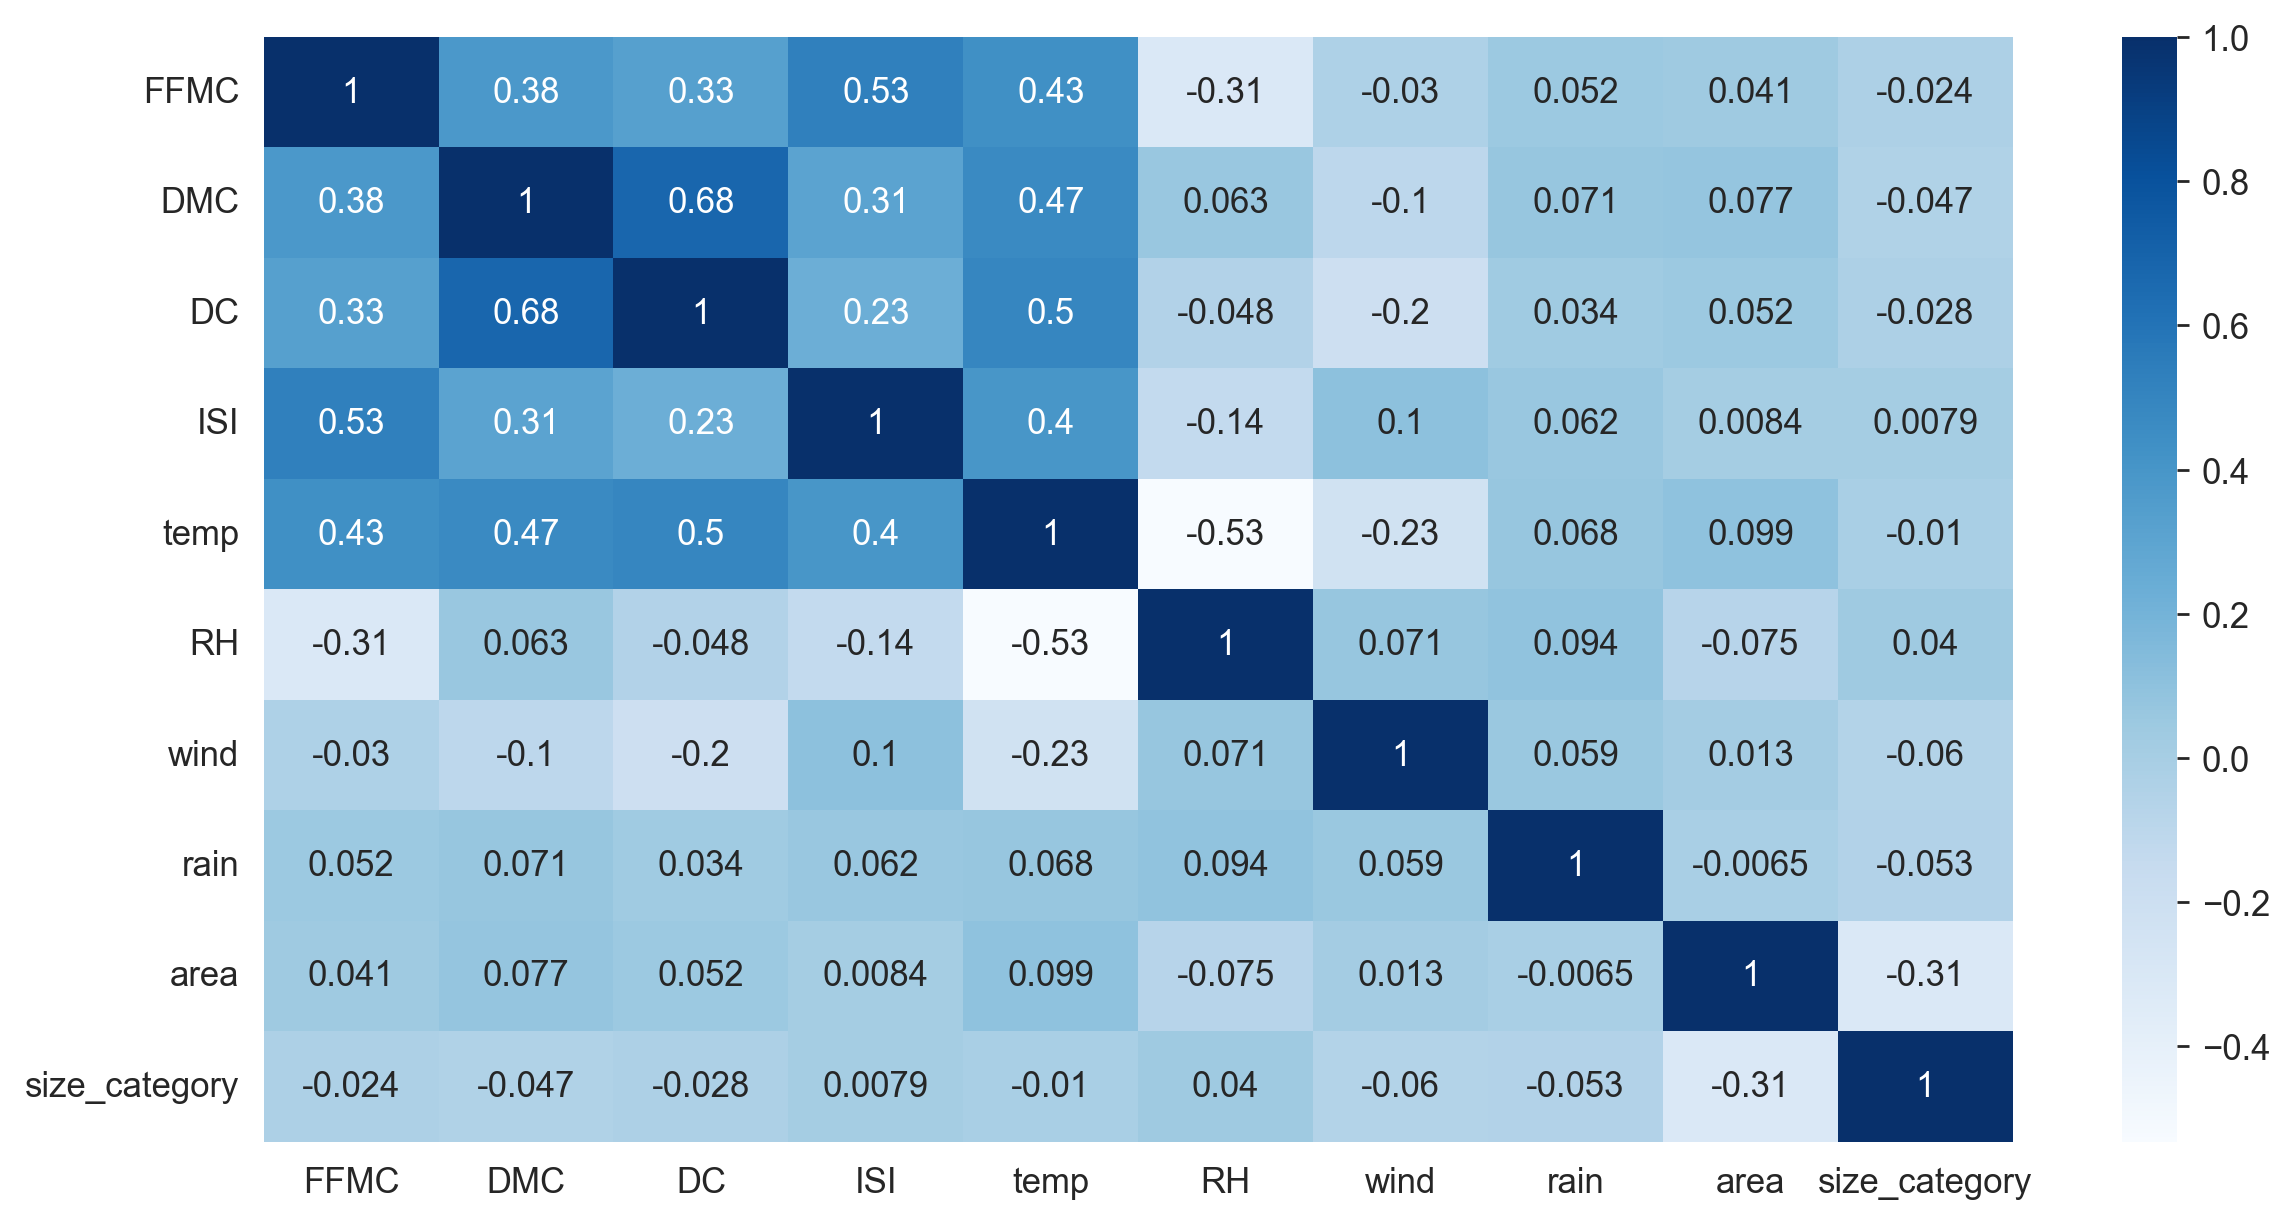

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.tight_layout();

###### ANN

In [20]:
#Libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [21]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [22]:
x = data.iloc[:,:-1]
y = data['size_category']

In [23]:
#Standardization

sc = StandardScaler()

x = sc.fit_transform(x)

###### Model Building

In [24]:
# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(units=12, kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units=8, kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units=1, activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 40, epochs = 10)

# Fitting the model

model.fit(x,y)

# Prediction using trained model

ypred = model.predict(x)

# Printing the metrics
print("Accuracy = ", accuracy_score(y,ypred))

16/16 [==============================] - 0s 0s/step
Accuracy =  0.9292730844793713


###### Hyperparameter Tuning

- Tuning Batch Size and epochs

In [25]:
# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(units=12, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units=8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units=1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    adam=Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

In [26]:
# Using GridSearchCV.

model = KerasClassifier(build_fn = create_model, verbose = 0)

# Define the grid search parameters
param_grids = {
    'batch_size' : [10,20,40],
    'epochs' : [10,50,100,150]
}

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = KFold(), verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END ....batch_size=10, epochs=10;, score=0.980 total time=   0.7s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................
[CV 2/5; 1/12] END ....batch_size=10, epochs=10;, score=0.863 total time=   0.7s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................
[CV 3/5; 1/12] END ....batch_size=10, epochs=10;, score=0.863 total time=   0.7s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................
[CV 4/5; 1/12] END ....batch_size=10, epochs=10;, score=0.843 total time=   0.8s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................
[CV 5/5; 1/12] END ....batch_size=10, epochs=10;, score=0.881 total time=   0.7s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................
[CV 1/5; 2/12] END ....batch_size=10, epochs=50;

[CV 5/5; 9/12] END ....batch_size=40, epochs=10;, score=0.792 total time=   0.5s
[CV 1/5; 10/12] START batch_size=40, epochs=50..................................
[CV 1/5; 10/12] END ...batch_size=40, epochs=50;, score=1.000 total time=   0.8s
[CV 2/5; 10/12] START batch_size=40, epochs=50..................................
[CV 2/5; 10/12] END ...batch_size=40, epochs=50;, score=0.853 total time=   0.7s
[CV 3/5; 10/12] START batch_size=40, epochs=50..................................
[CV 3/5; 10/12] END ...batch_size=40, epochs=50;, score=0.882 total time=   0.9s
[CV 4/5; 10/12] START batch_size=40, epochs=50..................................
[CV 4/5; 10/12] END ...batch_size=40, epochs=50;, score=0.882 total time=   1.3s
[CV 5/5; 10/12] START batch_size=40, epochs=50..................................
[CV 5/5; 10/12] END ...batch_size=40, epochs=50;, score=0.871 total time=   1.1s
[CV 1/5; 11/12] START batch_size=40, epochs=100.................................
[CV 1/5; 11/12] END ..batch_

In [29]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9213939070701599, using {'batch_size': 20, 'epochs': 50}
0.8860415458679199,0.04868638328364399 with: {'batch_size': 10, 'epochs': 10}
0.899767029285431,0.06094839621401875 with: {'batch_size': 10, 'epochs': 50}
0.9076101660728455,0.04799500312144157 with: {'batch_size': 10, 'epochs': 100}
0.9076295852661133,0.05104784367630491 with: {'batch_size': 10, 'epochs': 150}
0.8507085919380188,0.08113984077835133 with: {'batch_size': 20, 'epochs': 10}
0.9213939070701599,0.04070329461969385 with: {'batch_size': 20, 'epochs': 50}
0.8997087836265564,0.05886329318433357 with: {'batch_size': 20, 'epochs': 100}
0.9174723386764526,0.044994188912231226 with: {'batch_size': 20, 'epochs': 150}
0.752533495426178,0.1475864893885949 with: {'batch_size': 40, 'epochs': 10}
0.8977868318557739,0.0522251115050532 with: {'batch_size': 40, 'epochs': 50}
0.9017666339874267,0.05037495429439891 with: {'batch_size': 40, 'epochs': 100}
0.9017083883285523,0.04572990703189817 with: {'batch_size': 40, 'epochs': 

- Tuning Learning rate and Dropout rate

In [30]:
# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(units=12, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 20, epochs = 50)

# Define the grid search parameters

param_grids = {
    'learning_rate' : [0.001,0.01,0.1],
    'dropout_rate' : [0.0,0.1,0.2]
}

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = KFold(), verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.990 total time=   1.5s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.833 total time=   1.1s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.892 total time=   1.5s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.873 total time=   1.1s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.871 total time=   1.2s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [31]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9155309677124024, using {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.8919044613838196,0.052709749704724036 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9056299567222595,0.05114764096552657 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8585129022598267,0.07462929790920915 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8703164339065552,0.06891218059143174 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9155309677124024,0.03899693319462838 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.791593873500824,0.1066191795532959 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.848708987236023,0.07786686095803823 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9075907468795776,0.04343479536049379 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7504950642585755,0.15557380024254414 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


- Tuning Activation Function and Kernel Initializer

In [36]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(units=12, kernel_initializer = init, activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(units=8, kernel_initializer = init, activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(units=1, activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 20, epochs = 50)

# Define the grid search parameters

param_grids = {
    'activation_function' : ['softmax','relu','tanh','linear'],
    'init' : ['uniform','normal','zero']
}

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = KFold(), verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   1.4s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.843 total time=   1.1s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.892 total time=   1.1s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.892 total time=   1.4s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.871 total time=   1.2s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.912 total time=   1.3s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.951 total time=   1.3s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.921 total time=   1.3s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   1.1s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.922 total time=   1.1s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.912 total time=   1.1s
[CV 4/5; 11/12] START activation_f

In [37]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9449621438980103, using {'activation_function': 'linear', 'init': 'normal'}
0.8997476100921631,0.053255070647478114 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8781207442283631,0.06049275979924519 with: {'activation_function': 'softmax', 'init': 'normal'}
0.8879634976387024,0.0574908145095372 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9017472267150879,0.050796672819335954 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9095709443092346,0.04711529818985287 with: {'activation_function': 'relu', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'relu', 'init': 'zero'}
0.9331586003303528,0.03647228571710596 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9331586122512817,0.033734160961431815 with: {'activation_function': 'tanh', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9449427247047424,0.030873860819645424 with: {'activati

- Tuning Number of neurons in Activation layer

In [38]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(units=neuron1, kernel_initializer = 'normal', activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(units=neuron2, kernel_initializer = 'normal', activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(units=1, activation = 'sigmoid'))
    
    adam = Adam(learning_rate=0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 20, epochs = 50)

# Define the grid search parameters

param_grids = {
    'neuron1' : [4,8,12,16],
    'neuron2' : [2,4,8,10]
}

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = KFold(), verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START neuron1=4, neuron2=2.......................................
[CV 1/5; 1/16] END ........neuron1=4, neuron2=2;, score=1.000 total time=   1.1s
[CV 2/5; 1/16] START neuron1=4, neuron2=2.......................................
[CV 2/5; 1/16] END ........neuron1=4, neuron2=2;, score=0.961 total time=   1.2s
[CV 3/5; 1/16] START neuron1=4, neuron2=2.......................................
[CV 3/5; 1/16] END ........neuron1=4, neuron2=2;, score=0.912 total time=   1.4s
[CV 4/5; 1/16] START neuron1=4, neuron2=2.......................................
[CV 4/5; 1/16] END ........neuron1=4, neuron2=2;, score=0.931 total time=   1.4s
[CV 5/5; 1/16] START neuron1=4, neuron2=2.......................................
[CV 5/5; 1/16] END ........neuron1=4, neuron2=2;, score=0.931 total time=   1.1s
[CV 1/5; 2/16] START neuron1=4, neuron2=4.......................................
[CV 1/5; 2/16] END ........neuron1=4, neuron2=4;

[CV 1/5; 11/16] END ......neuron1=12, neuron2=8;, score=1.000 total time=   1.3s
[CV 2/5; 11/16] START neuron1=12, neuron2=8.....................................
[CV 2/5; 11/16] END ......neuron1=12, neuron2=8;, score=0.951 total time=   1.1s
[CV 3/5; 11/16] START neuron1=12, neuron2=8.....................................
[CV 3/5; 11/16] END ......neuron1=12, neuron2=8;, score=0.922 total time=   1.1s
[CV 4/5; 11/16] START neuron1=12, neuron2=8.....................................
[CV 4/5; 11/16] END ......neuron1=12, neuron2=8;, score=0.951 total time=   1.0s
[CV 5/5; 11/16] START neuron1=12, neuron2=8.....................................
[CV 5/5; 11/16] END ......neuron1=12, neuron2=8;, score=0.950 total time=   1.0s
[CV 1/5; 12/16] START neuron1=12, neuron2=10....................................
[CV 1/5; 12/16] END .....neuron1=12, neuron2=10;, score=1.000 total time=   1.4s
[CV 2/5; 12/16] START neuron1=12, neuron2=10....................................
[CV 2/5; 12/16] END .....neu

In [39]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9568045020103455, using {'neuron1': 8, 'neuron2': 2}
0.9469229221343994,0.03082414212338099 with: {'neuron1': 4, 'neuron2': 2}
0.9548243045806885,0.027434778480885796 with: {'neuron1': 4, 'neuron2': 4}
0.9548242926597595,0.028126751365051605 with: {'neuron1': 4, 'neuron2': 8}
0.9488642930984497,0.02883371990762969 with: {'neuron1': 4, 'neuron2': 10}
0.9568045020103455,0.026711877286114023 with: {'neuron1': 8, 'neuron2': 2}
0.9430013537406922,0.030048722496352556 with: {'neuron1': 8, 'neuron2': 4}
0.9449621438980103,0.02954151525089861 with: {'neuron1': 8, 'neuron2': 8}
0.9489225268363952,0.029340497417767817 with: {'neuron1': 8, 'neuron2': 10}
0.9469617605209351,0.031361012401013175 with: {'neuron1': 12, 'neuron2': 2}
0.9567850828170776,0.028132164235228196 with: {'neuron1': 12, 'neuron2': 4}
0.9548048853874207,0.02527874752448769 with: {'neuron1': 12, 'neuron2': 8}
0.9489419460296631,0.03122090287673125 with: {'neuron1': 12, 'neuron2': 10}
0.9528635144233704,0.028662988780515

######  Final model with optimum values of Hyperparameters

In [40]:
# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(units=8, kernel_initializer = 'normal', activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(units=2, kernel_initializer = 'normal', activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(units=1, activation = 'sigmoid'))
    
    adam = Adam(learning_rate=0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 20, epochs = 50)

# Fitting the model

model.fit(x,y)

# Prediction using trained model

y_predict = model.predict(x)

# Printing the metrics
print('Accuracy = ', accuracy_score(y,y_predict))

16/16 [==============================] - 0s 1ms/step
Accuracy =  0.9941060903732809


###### Checking Model Accuracy and Loss

In [47]:
ann = Sequential()

ann.add(Dense(units=8, kernel_initializer='normal', activation='linear'))
ann.add(Dense(units=2, kernel_initializer='normal', activation='linear'))

ann.add(Dense(units=1, activation='sigmoid'))

adam = Adam(learning_rate=0.01)
ann.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

ann.fit(x,y, validation_data=(x,y), epochs=50)

Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 0.6431 - accuracy: 0.7132 - val_loss: 0.5715 - val_accuracy: 0.7623
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5305 - accuracy: 0.7623 - val_loss: 0.4915 - val_accuracy: 0.7760
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4897 - accuracy: 0.7800 - val_loss: 0.4497 - val_accuracy: 0.7957
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4448 - accuracy: 0.7917 - val_loss: 0.4022 - val_accuracy: 0.8134
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3897 - accuracy: 0.8350 - val_loss: 0.3489 - val_accuracy: 0.8625
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.8605 - val_loss: 0.2938 - val_accuracy: 0.8861
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.3068 - accuracy: 0.8723 - val_loss: 0.2535 - val_accuracy: 0.8900
Epoch 8/50
16/16 [==

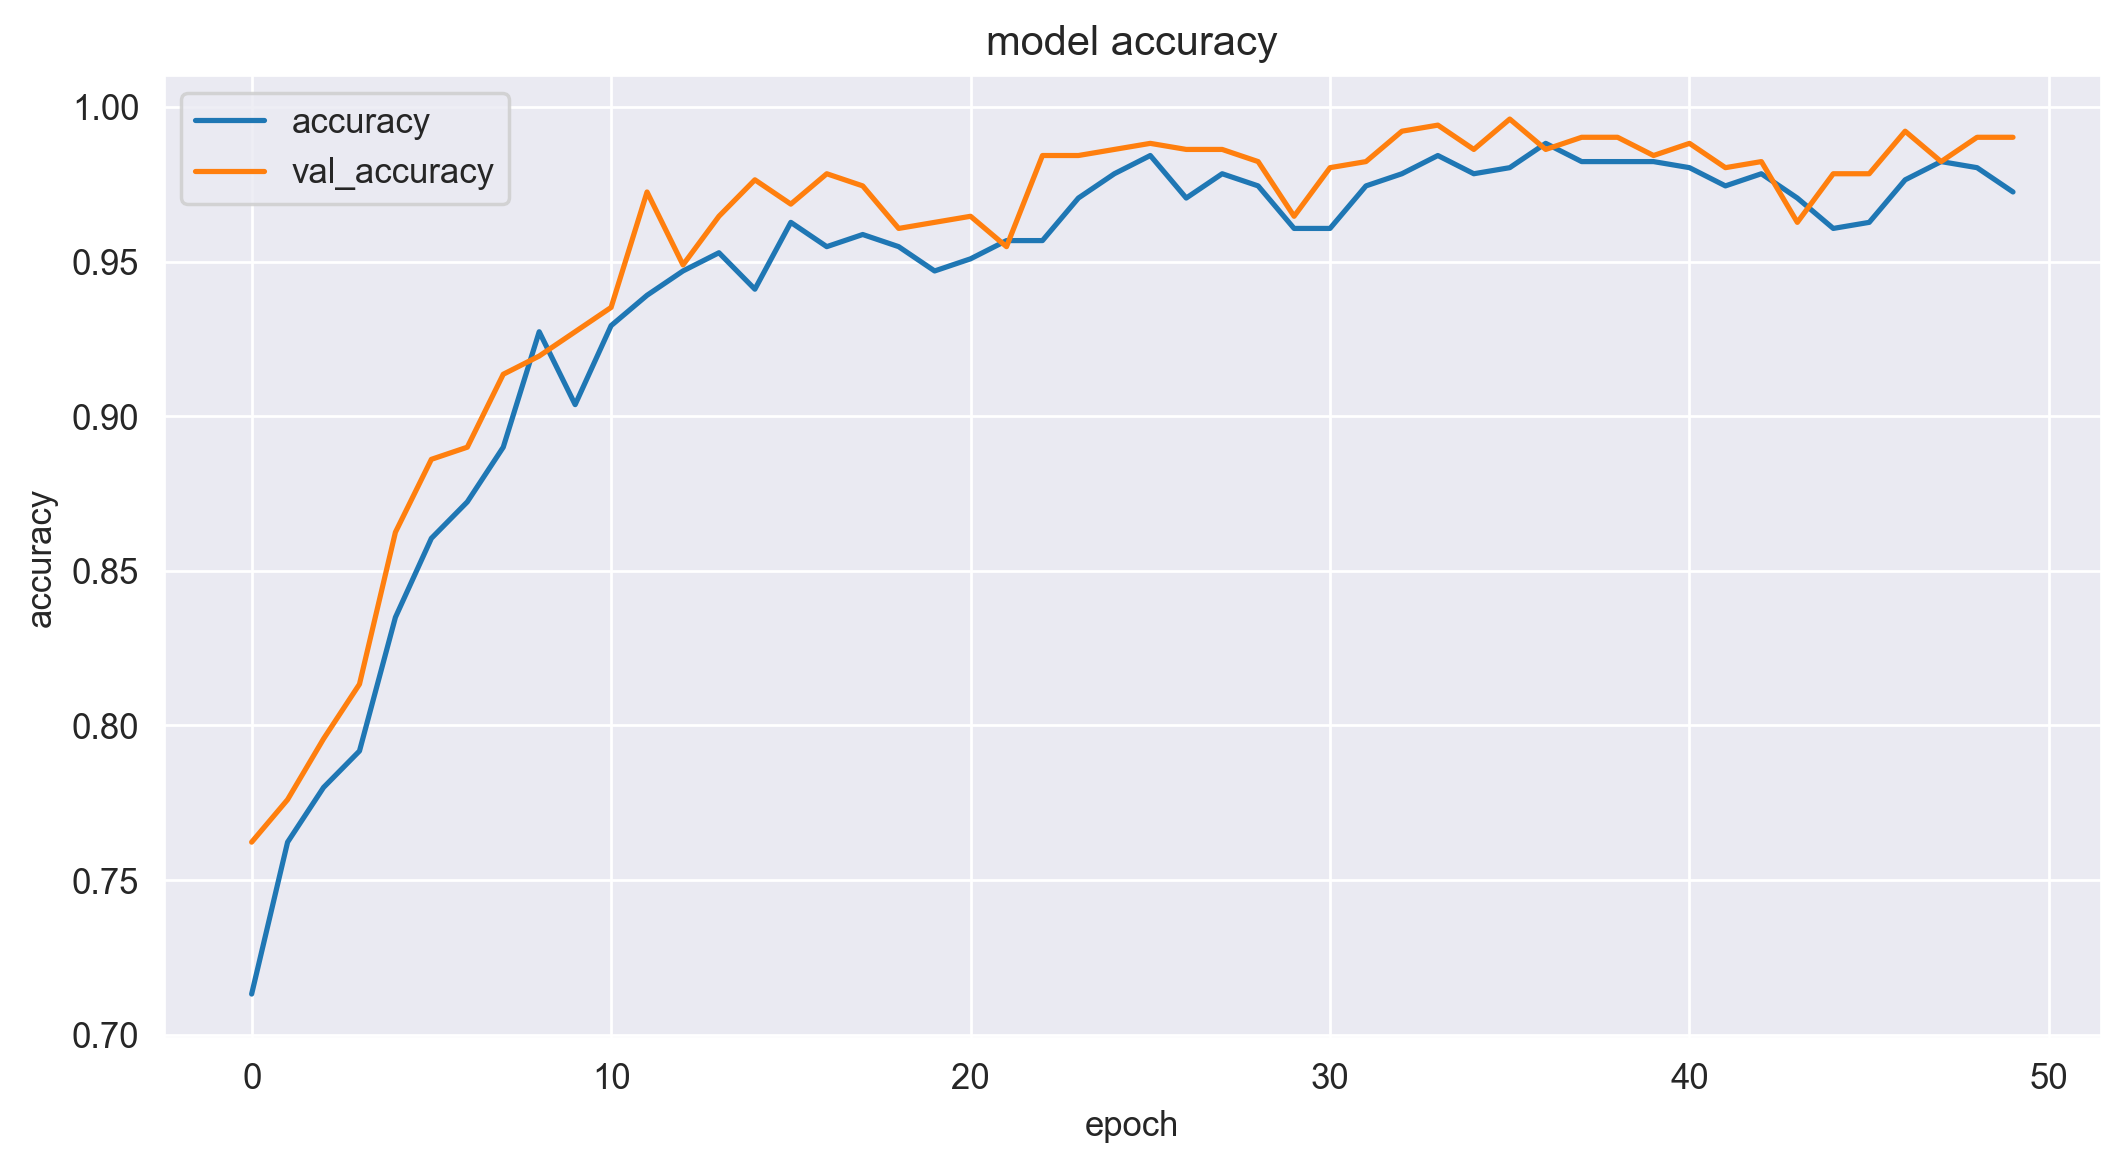

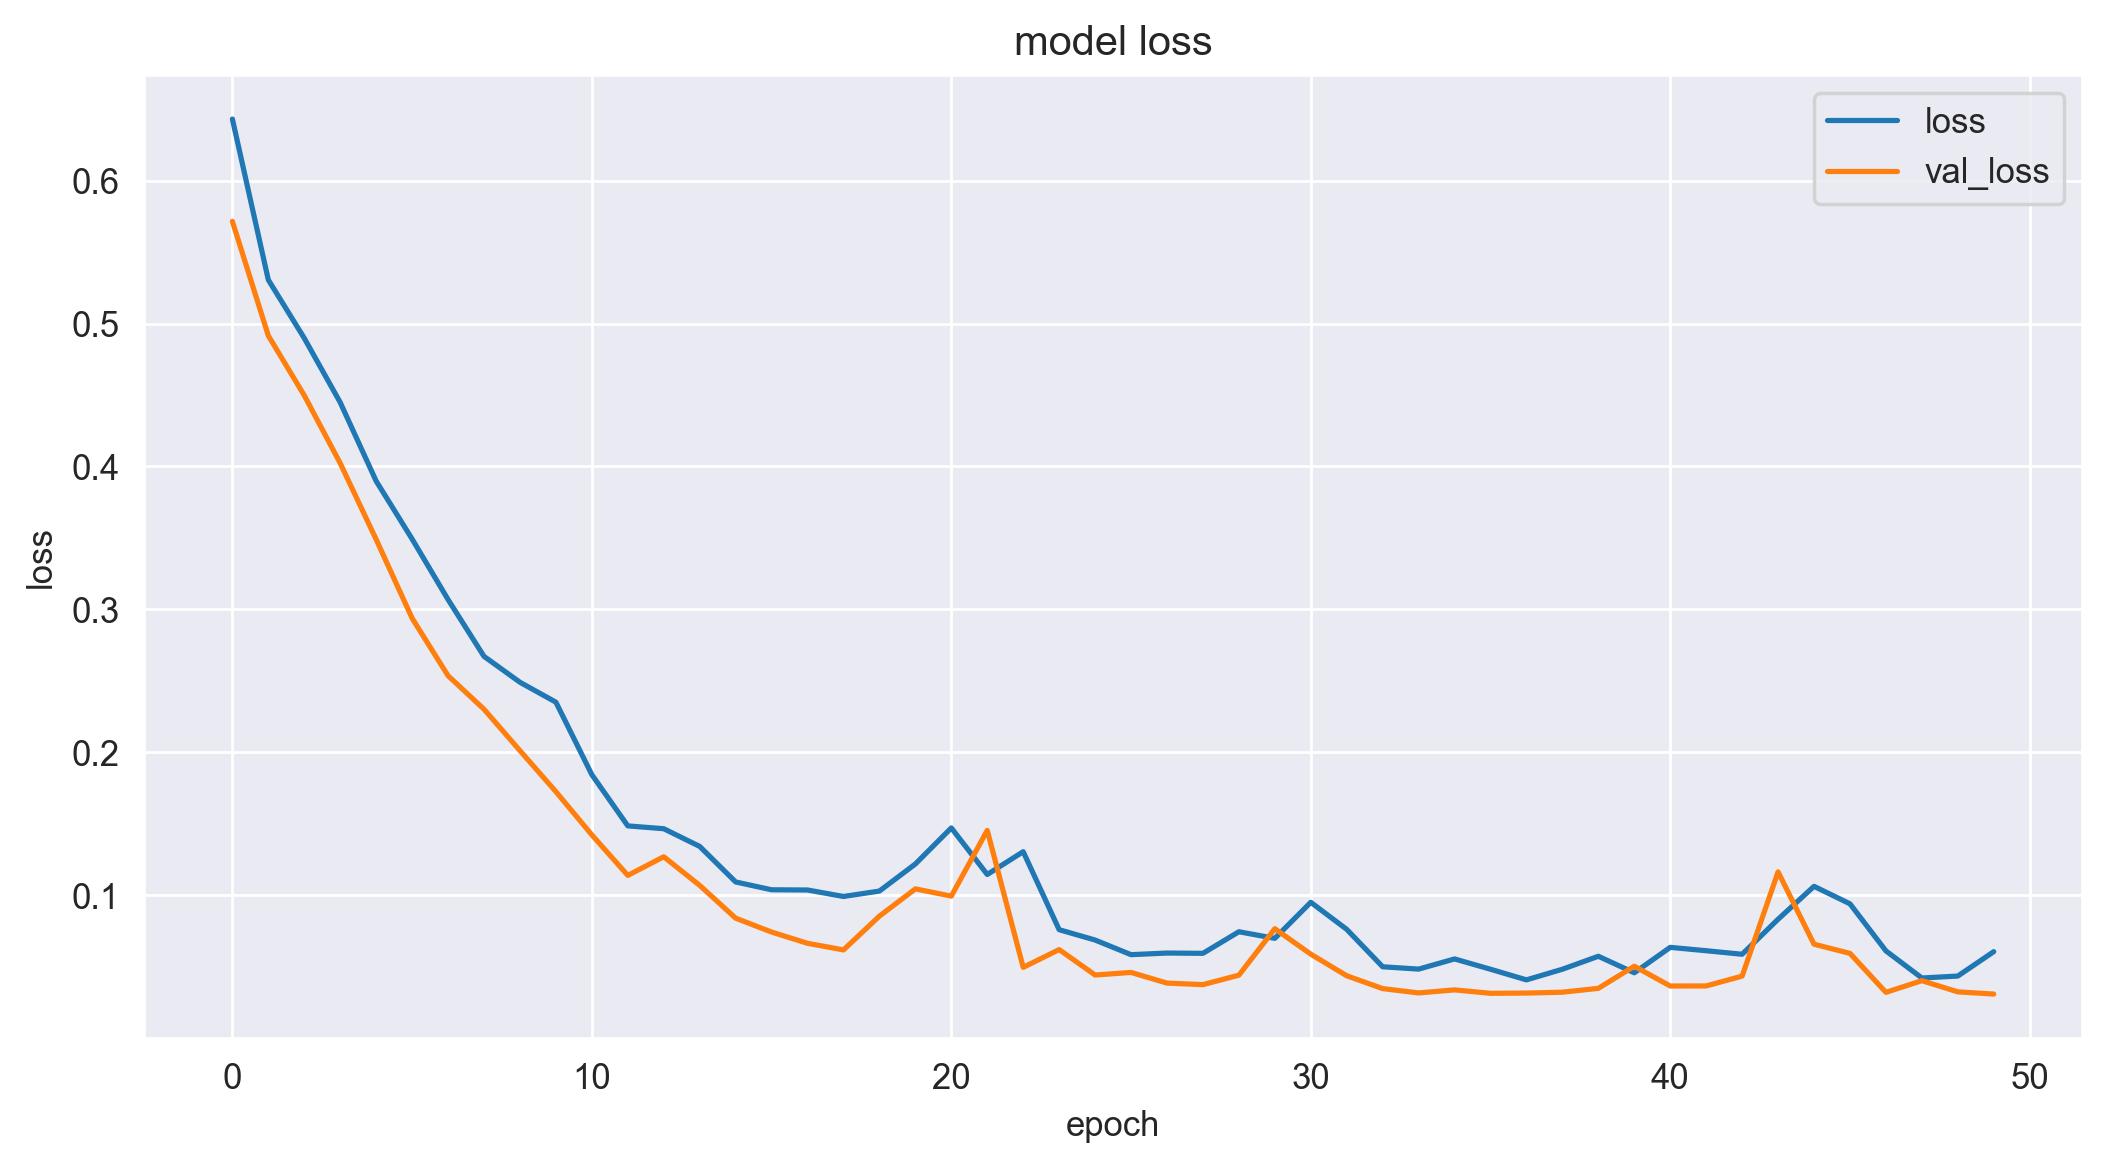

In [48]:
# summarize history for accuracy

plt.plot(ann.history.history['accuracy'])
plt.plot(ann.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

# summarize history for loss

plt.plot(ann.history.history['loss'])
plt.plot(ann.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

## =======================================================================